In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6) # 그림 그릴 배경 사이즈 비율
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
train = pd.read_csv('./data/bike_train.csv', parse_dates = ['datetime']) # 해당 컬럼을 datetime으로
train.shape

(10886, 12)

In [5]:
test = pd.read_csv('./data/bike_test.csv', parse_dates = ['datetime'])
test.shape

(6493, 9)

## EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

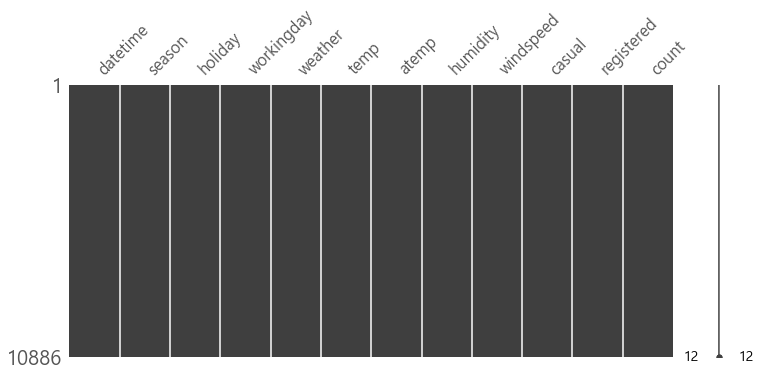

In [12]:
import missingno as msno
msno.matrix(train, figsize = (12, 5)) # not NaN

## datetime division

In [13]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [14]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test.shape

(6493, 15)

In [15]:
train.loc[:, 'year':].head()

,year,month,day,hour,minute,second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


## datetime Visualize

C:\Users\dxodn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,1,'시간당 대여량')]

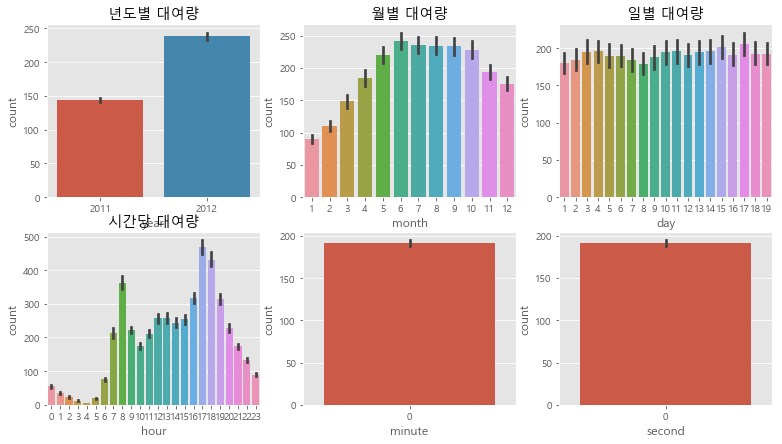

In [44]:
figure, ax = plt.subplots(2, 3, figsize = (13, 7))
sns.barplot('year', 'count', data = train, ax = ax[0][0])
sns.barplot('month', 'count', data = train, ax = ax[0][1])
sns.barplot('day', 'count', data = train, ax = ax[0][2])
sns.barplot('hour', 'count', data = train, ax = ax[1][0])
sns.barplot('minute', 'count', data = train, ax = ax[1][1])
sns.barplot('second', 'count', data = train, ax = ax[1][2])

ax[0][0].set(title = '년도별 대여량')
ax[0][1].set(title = '월별 대여량')
ax[0][2].set(title = '일별 대여량')
ax[1][0].set(title = '시간당 대여량')

- 일별 대여량은 19일까지밖에 없음, 피처로 사용 불가
- 분, 초는 의미없음

In [56]:
## train, test 분, 초 삭제
del train['minute']
del train['second']
del test['minute']
del test['second']

In [58]:
train.shape, test.shape

((10886, 17), (6493, 14))

In [47]:
## day of week 추가
train['DOW'] = train['datetime'].dt.dayofweek

In [48]:
train['DOW'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: DOW, dtype: int64

In [55]:
test['DOW'] = test['datetime'].dt.dayofweek
test['DOW'].value_counts()

4    958
5    928
0    928
2    924
6    923
3    918
1    914
Name: DOW, dtype: int64

In [59]:
# discrete feature -> continuous feature
categorical_feature_names = ['season', 'holiday', 'workingday', 'weather',
                            'DOW', 'month', 'year', 'hour']

In [60]:
for i in categorical_feature_names:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

In [62]:
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'year', 'hour', 'DOW', 'holiday', 'workingday']

In [63]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,DOW,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [64]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,DOW,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [65]:
y_train = train['count']
print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

## Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
pred = model.predict(X_train)
pred

array([-72.78152352, -67.85808278, -60.01261659, ..., 296.67105314,
       310.73925113, 303.2093096 ])

In [101]:
pred2 = model.predict(X_test)
pred2

array([-29.97310059, -12.80380524,  -4.95833905, ..., 212.22212716,
       231.47094556, 220.63633834])

In [102]:
pred2 = [abs(int(i)) for i in pred2]

In [103]:
pred2 = pd.DataFrame({'datetime': test['datetime'],'count': pred2})
pred2.to_csv('result.csv', index = False)

## submission

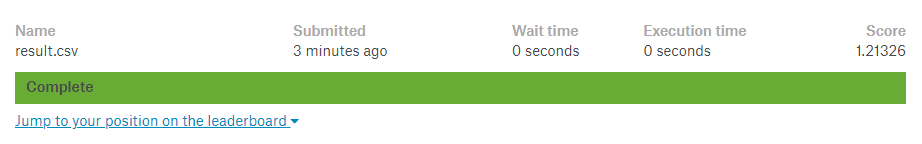

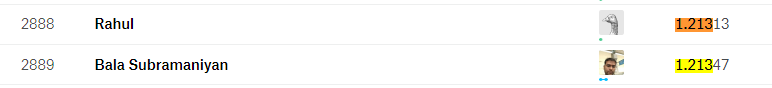

rank 2889

In [104]:
2889/3248 # 3248 = len(participating team)

0.8894704433497537

88%

In [76]:
dat = pd.DataFrame({'y_train': y_train, 'prediction': pred, 'diff': y_train - pred})

## test set RMSE

In [78]:
value = np.sqrt(sum(dat['diff'] ** 2 ) / len(dat['diff']))

In [79]:
value

141.86308569184064